In [1]:
import numpy as np
import pandas as pd

import geohash
import gc
from geopy import distance
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from IPython.display import clear_output

import os

In [2]:
df = pd.read_pickle('./data/train_df.pkl')

In [3]:
def order_to_time(order):
    '''we dont actually need day, just timestamp enough'''
    order = order % 96
    return order//4, order%4 * 15

def timestamp_to_hour_minute(timestamp):
    timestamp = timestamp.split(':')
    return int(timestamp[0]), int(timestamp[1])

In [4]:
df['time'] = df.order.apply(order_to_time)
df['lat'] = df.geohash6.apply(lambda x: geohash.decode(x)[0])
df['long'] = df.geohash6.apply(lambda x: geohash.decode(x)[1])
df['hour'] = df.timestamp.apply(lambda x: timestamp_to_hour_minute(x)[0])

In [5]:
!mkdir day_median
!mkdir hour_median
!mkdir time_median
!mkdir order_median

mkdir: day_median: File exists
mkdir: hour_median: File exists
mkdir: time_median: File exists
mkdir: order_median: File exists


In [23]:
for d in df.day.unique():
    temp_df = df[df.day == d]
    temp_df = temp_df.groupby('geohash6').median()
    figure(num=None, figsize=(8, 6))
    plt.scatter(temp_df.lat.values, temp_df.long.values, c=temp_df.demand.values)
    plt.colorbar()
    plt.savefig('./day_median/{0}.png'.format(d))
    plt.close('all')

In [24]:
for d in df.hour.unique():
    temp_df = df[df.hour == d]
    temp_df = temp_df.groupby('geohash6').median()
    figure(num=None, figsize=(8, 6))
    plt.scatter(temp_df.lat.values, temp_df.long.values, c=temp_df.demand.values)
    plt.colorbar()
    plt.savefig('./hour_median/{0}.png'.format(d))
    plt.close('all')

In [26]:
for d in df.time.unique():
    temp_df = df[df.time == d]
    temp_df = temp_df.groupby('geohash6').median()
    figure(num=None, figsize=(8, 6))
    plt.scatter(temp_df.lat.values, temp_df.long.values, c=temp_df.demand.values)
    plt.colorbar()
    plt.savefig('./time_median/{0}.png'.format(d))
    plt.close('all')

In [25]:
for d in df.order.unique():
    temp_df = df[df.order == d]
    temp_df = temp_df.groupby('geohash6').median()
    figure(num=None, figsize=(8, 6))
    plt.scatter(temp_df.lat.values, temp_df.long.values, c=temp_df.demand.values)
    plt.colorbar()
    plt.savefig('./order_median/{0}.png'.format(d))
    plt.close(fig)
    plt.close('all')

In [27]:
!mkdir day_mean
!mkdir hour_mean
!mkdir time_mean
!mkdir order_mean

In [28]:
for d in df.day.unique():
    temp_df = df[df.day == d]
    temp_df = temp_df.groupby('geohash6').mean()
    figure(num=None, figsize=(8, 6))
    plt.scatter(temp_df.lat.values, temp_df.long.values, c=temp_df.demand.values)
    plt.colorbar()
    plt.savefig('./day_mean/{0}.png'.format(d))
    plt.close('all')

In [29]:
for d in df.hour.unique():
    temp_df = df[df.hour == d]
    temp_df = temp_df.groupby('geohash6').mean()
    figure(num=None, figsize=(8, 6))
    plt.scatter(temp_df.lat.values, temp_df.long.values, c=temp_df.demand.values)
    plt.colorbar()
    plt.savefig('./hour_mean/{0}.png'.format(d))
    plt.close('all')

In [30]:
for d in df.time.unique():
    temp_df = df[df.time == d]
    temp_df = temp_df.groupby('geohash6').mean()
    figure(num=None, figsize=(8, 6))
    plt.scatter(temp_df.lat.values, temp_df.long.values, c=temp_df.demand.values)
    plt.colorbar()
    plt.savefig('./time_mean/{0}.png'.format(d))
    plt.close('all')

In [31]:
for d in df.order.unique():
    temp_df = df[df.order == d]
    temp_df = temp_df.groupby('geohash6').mean()
    figure(num=None, figsize=(8, 6))
    plt.scatter(temp_df.lat.values, temp_df.long.values, c=temp_df.demand.values)
    plt.colorbar()
    plt.savefig('./order_mean/{0}.png'.format(d))
    plt.close('all')

In [44]:
96 * 7

672

In [45]:
df.order.unique().shape

(4896,)

In [46]:
4896 / 672

7.285714285714286

In [57]:
!mkdir weekly_eda

In [58]:
for gh in df.geohash6.unique():
    directory_name = 'weekly_eda/{0}_weekly'.format(gh)
    try:
        os.mkdir(directory_name)
    except Exception as ex:
        pass
    gh_df = df[df.geohash6 == gh]
    week_start_order = 0
    week_end_order = 672
    while week_end_order < 4896:
        weekly_df = gh_df[(gh_df.order >= week_start_order) & (gh_df.order < week_end_order)].sort_values(by=['order'])
        figure(num=None, figsize=(25, 5))
        plt.plot(weekly_df.order, weekly_df.demand)
        plt.savefig('./{0}/{1}-{2}.png'.format(directory_name, week_start_order, week_end_order))
        week_start_order = week_end_order
        week_end_order += 672
    plt.close('all')

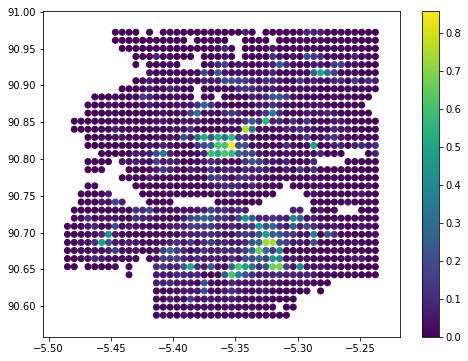

In [5]:
temp_df = df.groupby('geohash6').mean()
figure(num=None, figsize=(8, 6))
plt.scatter(temp_df.lat.values, temp_df.long.values, c=temp_df.demand.values)
plt.colorbar()
plt.show()

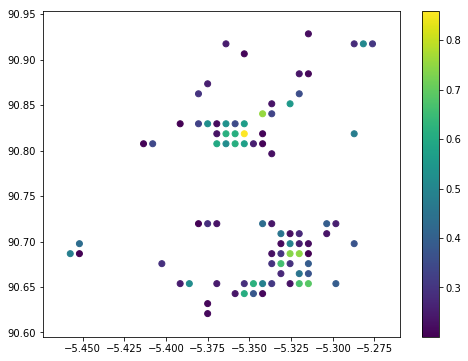

In [23]:
temp_df = df.groupby('geohash6').mean()
temp_df = temp_df[temp_df.demand > 0.2]
figure(num=None, figsize=(8, 6))
plt.scatter(temp_df.lat.values, temp_df.long.values, c=temp_df.demand.values)
plt.colorbar()
plt.show()